### 머신러닝 모델 적합


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier , StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score,GridSearchCV

In [2]:
def eval(test,pred):
    acc = accuracy_score(test,pred)
    f1 = f1_score(test,pred)
    precision = precision_score(test,pred)
    recall = recall_score(test,pred)
    print('##############\n',confusion_matrix(test,pred),
    "############\n",f'acc_score: {acc}\n f1_score: {f1} \n precision: {precision} \n recall: {recall}')

## 임계값 =[] 리스트생성 후 for 구문
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds=[0.5,0.6,0.7,0.8,0.9]):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        eval(y_test , custom_predict)


def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

## roc curve_plot    
def roc_curve_plot(y_test,pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba) ## 입력시 1레이블 컬럼만 추출
    
    # Roc curve를 plot 곡선으로 기름
    plt.plot(fprs,tprs,label='ROC')
    ## 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],"k--",label="ramdom")
    
    ## fpr x축을 scale을 0.1단위로 변경 x,y축 명 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    plt.show()


In [6]:
train_df

,거래량,카드거래발생거리,실소유자나이,카드거래간시간,중서부,북동부,남부,서부,상반기,하반기,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,이상거래
0,-0.726008,0.915394,2.317189,1.327249,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.748638,-2.180349,0.409085,-0.546514,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.740962,-0.781092,-0.962364,2.468824,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,-0.581060,0.098502,0.766855,-0.553466,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.468711,-1.461345,0.051316,-0.258119,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257827,2.331814,-0.079790,-0.187197,-0.612517,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
257828,-0.169079,0.222197,-1.200877,1.472015,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
257829,2.269863,-1.571614,-0.008312,1.345861,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
257830,1.524262,-0.801992,0.409085,0.272870,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
'거래량','주간','카드거래간시간','실소유자나이','하반기','category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel','중서부','남부','서부','북동부','대도시','중소도시','소도시'

In [3]:
train_df = pd.read_csv('./train_final_over.csv',encoding='UTF-8-sig',index_col=0)
train_df = train_df[['거래량','주간','카드거래간시간','실소유자나이','하반기','category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel','이상거래']]
x_train = train_df.drop('이상거래',axis=1)
y_train = train_df[['이상거래']]

In [4]:
test_df = pd.read_csv('./test_final.csv',encoding='UTF-8-sig',index_col=0)
test_df = test_df[['거래량','주간','카드거래간시간','실소유자나이','하반기','category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel','이상거래']]
x_test = test_df.drop(['이상거래'],axis=1)
y_test = test_df[['이상거래']]

In [5]:
test_df['이상거래'].value_counts()

0    553574
1      2145
Name: 이상거래, dtype: int64

In [ ]:
## 랜덤포레스트에서 최적의 하이퍼 파라미터를 찾아서 
## 적합후 feature_importance 변수 선택
rf = RandomForestClassifier(random_state=1)
param = {
    'max_depth':[4,5,6],      
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2]
}


grid_rf = GridSearchCV(rf,param_grid=param,cv=5,refit=True,scoring='accuracy')
grid_rf.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_rf.cv_results_)
print(scores_df.iloc[:,4:])

In [76]:
### 진짜 적합
start = time.time()

best_rf =RandomForestClassifier(random_state=1,max_depth=5,min_samples_split=2,min_samples_leaf=1)
best_rf.fit(x_train,y_train)  


pred_rf = best_rf.predict(x_test)
pred_prob_rf = best_rf.predict_proba(x_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.35).fit(pred_prob_rf) 
custom_rf = binarizer.transform(pred_prob_rf)


end = time.time()
print(f"모델적합 예측 시간: {end-start}")
 ### 서치로 찾은 하이퍼 파라미터 5,1,2

In [77]:
# 임계값 조정하여 precision recall trade_off 확인
get_eval_by_threshold(y_test,pred_prob_rf) 

## 임계값 0.35일 떄 f1 score = 0.896

임곗값: 0.25
##############
 [[3807  483]
 [ 137 2008]] ############
 acc_score: 0.9036519036519036
 f1_score: 0.8662640207075065 
 precision: 0.8061019670814934 
 recall: 0.9361305361305361
임곗값: 0.3
##############
 [[3948  342]
 [ 232 1913]] ############
 acc_score: 0.9108003108003108
 f1_score: 0.8695454545454546 
 precision: 0.8483370288248337 
 recall: 0.8918414918414919
임곗값: 0.35
##############
 [[4122  168]
 [ 266 1879]] ############
 acc_score: 0.9325563325563325
 f1_score: 0.8964694656488551 
 precision: 0.9179286761113825 
 recall: 0.875990675990676
임곗값: 0.45
##############
 [[4221   69]
 [ 500 1645]] ############
 acc_score: 0.9115773115773116
 f1_score: 0.8525524747343872 
 precision: 0.9597432905484248 
 recall: 0.7668997668997669
임곗값: 0.5
##############
 [[4242   48]
 [ 514 1631]] ############
 acc_score: 0.9126651126651126
 f1_score: 0.8530334728033473 
 precision: 0.9714115544967242 
 recall: 0.7603729603729604


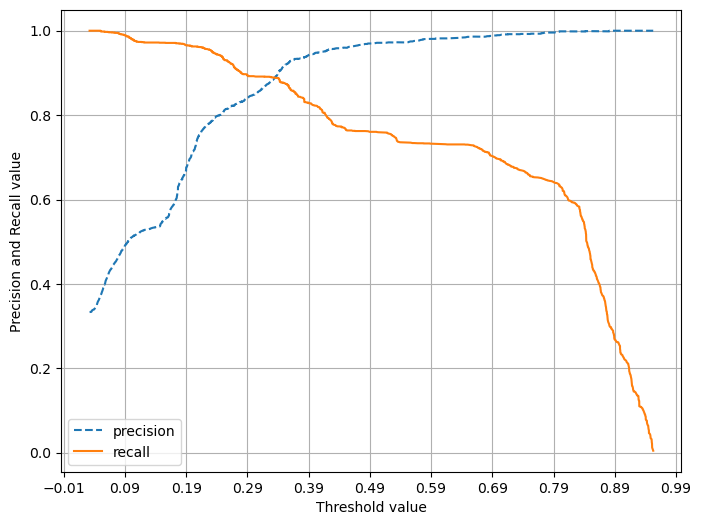

In [78]:
precision_recall_curve_plot(y_test,pred_prob_rf)

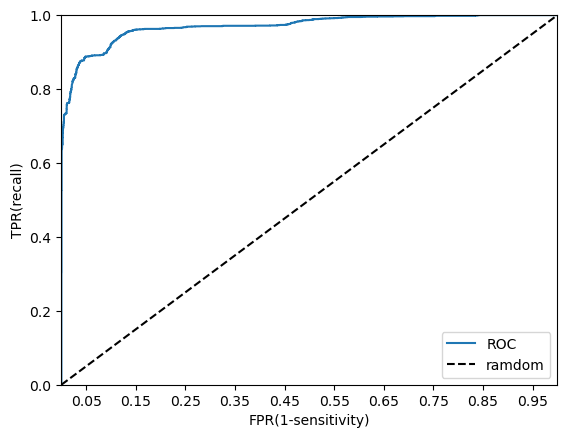

auc 값: 0.9705


In [79]:

## roc 커브 auc 값
roc_curve_plot(y_test,pred_prob_rf)
auc_score = roc_auc_score(y_test,pred_prob_rf)
print(f'auc 값: {np.round(auc_score,4)}')

- logistic

In [ ]:
## 주요 파라미터는 penality, C, solver
# C는 규제 강도를 조절하는 alpha 값의 역수, 즉 C = 1/alpha. C 값이 작을수록 규제 강도가 크다
# 비용함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다
# 회귀계수가 크면 과적합 발생함
# solver는 회귀 계수 최적화를 위한 다양한 최적화 방식. liblinear 은 solver의 기본 설정값. 다차원이고 작은 데이터 세트에서 효과적으로 동작

start = time.time()
lr=LogisticRegression(random_state=1,solver='liblinear')
param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(lr,param_grid=param,cv=5,refit=True,scoring='accuracy')
grid_lr.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_lr.cv_results_)
print(scores_df.iloc[:,4:])
end = time.time()
print(f"모델적합 예측 시간: {end-start}")


   param_C param_penalty                         params  split0_test_score  \
0    0.001            l1  {'C': 0.001, 'penalty': 'l1'}           0.885213   
1    0.001            l2  {'C': 0.001, 'penalty': 'l2'}           0.881217   
2     0.01            l1   {'C': 0.01, 'penalty': 'l1'}           0.880995   
3     0.01            l2   {'C': 0.01, 'penalty': 'l2'}           0.876332   
4      0.1            l1    {'C': 0.1, 'penalty': 'l1'}           0.876110   
5      0.1            l2    {'C': 0.1, 'penalty': 'l2'}           0.875222   
6        1            l1      {'C': 1, 'penalty': 'l1'}           0.873002   
7        1            l2      {'C': 1, 'penalty': 'l2'}           0.873224   
8       10            l1     {'C': 10, 'penalty': 'l1'}           0.872780   
9       10            l2     {'C': 10, 'penalty': 'l2'}           0.872780   
10     100            l1    {'C': 100, 'penalty': 'l1'}           0.872780   
11     100            l2    {'C': 100, 'penalty': 'l2'}         

In [80]:
best_lr=LogisticRegression(random_state=1,solver='liblinear',penalty='l1',C=0.01)

best_lr.fit(x_train,y_train)

pred_lr = best_lr.predict(x_test)
pred_prob_lr = best_lr.predict_proba(x_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.35).fit(pred_prob_lr) 
custom_lr = binarizer.transform(pred_prob_lr)

In [81]:
pd.Series(best_lr.coef_[0],index=x_train.columns).sort_values() 
## 라쏘 규제를 통하여 변수의 영향을 0으로 만든 변수들이 존재
## 카테고리 변수중에도 gas_transport 와 grocery_pos의 경우 이상거래일 확률이 올라감

주간                        -1.913645
category_shopping_pos     -0.495459
category_shopping_net     -0.260807
카드거래간시간                   -0.209059
하반기                       -0.148089
category_misc_pos          0.000000
category_misc_net          0.000000
category_kids_pets         0.000000
category_home              0.000000
category_health_fitness    0.000000
category_travel            0.000000
category_food_dining       0.000000
category_entertainment     0.000000
category_personal_care     0.000000
category_grocery_net       0.000000
실소유자나이                     0.014719
category_gas_transport     0.472125
category_grocery_pos       0.527179
거래량                        2.216154
dtype: float64

In [82]:
# 임계값 조정하여 precision recall trade_off 확인
get_eval_by_threshold(y_test,pred_prob_lr) 

## 임계값 0.35일 떄 f1 score = 0.896

임곗값: 0.25
##############
 [[3561  729]
 [ 393 1752]] ############
 acc_score: 0.8256410256410256
 f1_score: 0.7574578469520102 
 precision: 0.7061668681983071 
 recall: 0.8167832167832167
임곗값: 0.3
##############
 [[3719  571]
 [ 547 1598]] ############
 acc_score: 0.8262626262626263
 f1_score: 0.7408437644877144 
 precision: 0.7367450437989858 
 recall: 0.744988344988345
임곗값: 0.35
##############
 [[3950  340]
 [ 589 1556]] ############
 acc_score: 0.8556332556332557
 f1_score: 0.7701064093046275 
 precision: 0.820675105485232 
 recall: 0.7254079254079254
임곗값: 0.45
##############
 [[4162  128]
 [ 605 1540]] ############
 acc_score: 0.8860916860916861
 f1_score: 0.8077629163388408 
 precision: 0.9232613908872902 
 recall: 0.717948717948718
임곗값: 0.5
##############
 [[4198   92]
 [ 621 1524]] ############
 acc_score: 0.8891996891996892
 f1_score: 0.8104227599042807 
 precision: 0.943069306930693 
 recall: 0.7104895104895105


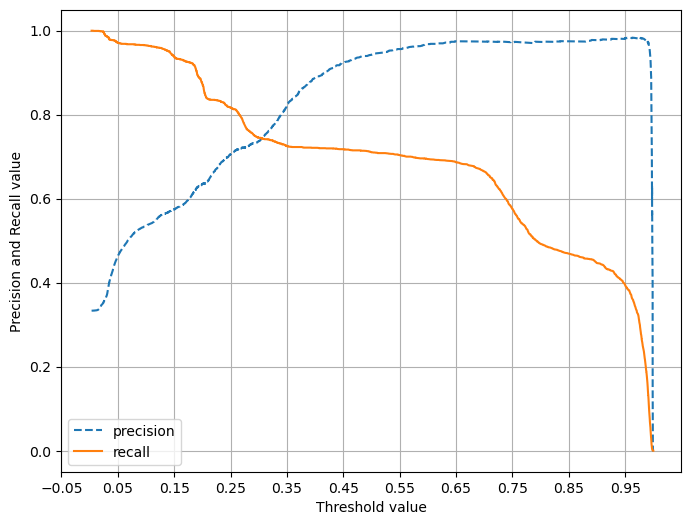

In [83]:
precision_recall_curve_plot(y_test,pred_prob_lr)

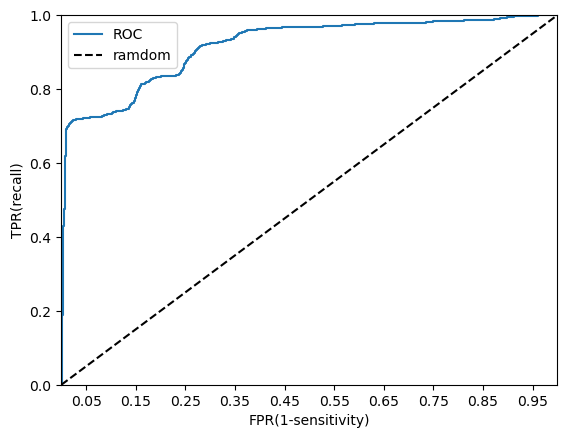

auc 값: 0.9168


In [84]:
## roc 커브 auc 값
roc_curve_plot(y_test,pred_prob_lr)
auc_score = roc_auc_score(y_test,pred_prob_lr)
print(f'auc 값: {np.round(auc_score,4)}')

- svm

In [ ]:
start = time.time()
svm = SVC(random_state=1)
param = {
    'gamma':[0.01,0.1,1,10],
    'C':[10,1,0.1,0.01],
    'kernel':['rbf']
}

grid_svm = GridSearchCV(svm,param_grid=param,cv=5,refit=True,scoring='accuracy')
grid_svm.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_svm.cv_results_)
print(scores_df.iloc[:,4:])

end = time.time()
print(f"모델적합 예측 시간: {end-start}")

In [5]:
best_svm = SVC(random_state=1, C=0.01, gamma='auto', kernel='rbf', probability=True)

best_svm.fit(x_train,y_train)

pred_svm = best_svm.predict(x_test)
pred_prob_svm = best_svm.predict_proba(x_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.3).fit(pred_prob_svm) 
custom_svc = binarizer.transform(pred_prob_svm)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 남부
- 남성
- 대도시
- 북동부
- 상반기
- ...


In [ ]:
pred_svm = best_svm.predict(x_test)
pred_prob_svm = best_svm.predict_proba(x_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.3).fit(pred_prob_svm) 
custom_svc = binarizer.transform(pred_prob_svm)

In [91]:
# 임계값 조정하여 precision recall trade_off 확인
get_eval_by_threshold(y_test,pred_prob_svm) 

## 임계값 0.35일 떄 f1 score = 0.90517

임곗값: 0.25
##############
 [[4149  141]
 [ 259 1886]] ############
 acc_score: 0.9378399378399378
 f1_score: 0.9041227229146693 
 precision: 0.9304390725209669 
 recall: 0.8792540792540793
임곗값: 0.3
##############
 [[4190  100]
 [ 284 1861]] ############
 acc_score: 0.9403263403263403
 f1_score: 0.9064783244033122 
 precision: 0.9490056093829679 
 recall: 0.8675990675990676
임곗값: 0.35
##############
 [[4201   89]
 [ 298 1847]] ############
 acc_score: 0.9398601398601398
 f1_score: 0.9051703013967164 
 precision: 0.9540289256198347 
 recall: 0.8610722610722611
임곗값: 0.45
##############
 [[4216   74]
 [ 315 1830]] ############
 acc_score: 0.9395493395493395
 f1_score: 0.9039268955297605 
 precision: 0.9611344537815126 
 recall: 0.8531468531468531
임곗값: 0.5
##############
 [[4225   65]
 [ 329 1816]] ############
 acc_score: 0.9387723387723388
 f1_score: 0.9021361152508695 
 precision: 0.9654439128123339 
 recall: 0.8466200466200466


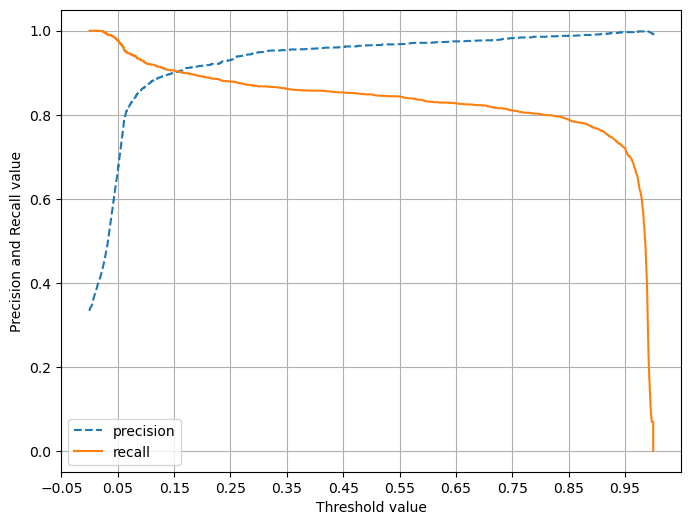

In [92]:
precision_recall_curve_plot(y_test,pred_prob_svm)

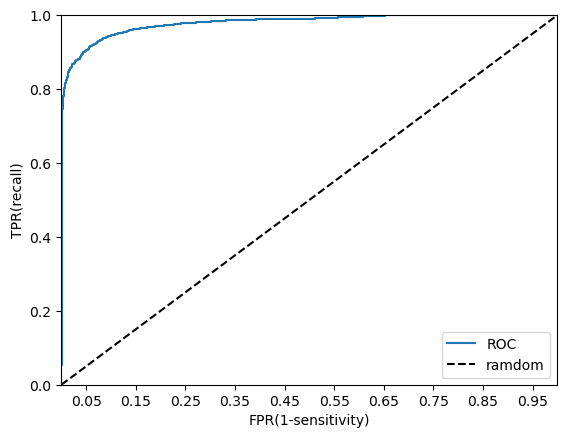

auc 값: 0.9793


In [93]:
## roc 커브 auc 값
roc_curve_plot(y_test,pred_prob_svm)
auc_score = roc_auc_score(y_test,pred_prob_svm)
print(f'auc 값: {np.round(auc_score,4)}')

- knn

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_jobs=-1)
param={
    'n_neighbors':[3,4,5,6,7,8,9,10]
}

grid_knn = GridSearchCV(knn,param_grid=param,cv=5,refit=True,scoring='accuracy')
grid_knn.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_knn.cv_results_)
print(scores_df.iloc[:,4:])
end = time.time()
print(f"모델적합 예측 시간: {end-start}")

  param_n_neighbors               params  split0_test_score  \
0                 3   {'n_neighbors': 3}           0.933393   
1                 4   {'n_neighbors': 4}           0.933615   
2                 5   {'n_neighbors': 5}           0.930284   
3                 6   {'n_neighbors': 6}           0.932726   
4                 7   {'n_neighbors': 7}           0.931172   
5                 8   {'n_neighbors': 8}           0.934281   
6                 9   {'n_neighbors': 9}           0.930284   
7                10  {'n_neighbors': 10}           0.929174   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.939387           0.924734           0.942483           0.936931   
1           0.941829           0.926066           0.943593           0.939596   
2           0.941607           0.925844           0.942483           0.935821   
3           0.942940           0.925622           0.940928           0.938041   
4           0.943384       

In [94]:
best_knn = KNeighborsClassifier() ## 디폴트로 넣는 것이 좋아보임

best_knn.fit(x_train,y_train)

pred_knn = best_knn.predict(x_test)
pred_prob_knn = best_knn.predict_proba(x_test)[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.35).fit(pred_prob_lr) 
custom_knn = binarizer.transform(pred_prob_knn)

In [95]:
get_eval_by_threshold(y_test,pred_prob_knn )

임곗값: 0.25
##############
 [[4021  269]
 [ 163 1982]] ############
 acc_score: 0.9328671328671329
 f1_score: 0.9017288444040037 
 precision: 0.8804975566414927 
 recall: 0.924009324009324
임곗값: 0.3
##############
 [[4021  269]
 [ 163 1982]] ############
 acc_score: 0.9328671328671329
 f1_score: 0.9017288444040037 
 precision: 0.8804975566414927 
 recall: 0.924009324009324
임곗값: 0.35
##############
 [[4021  269]
 [ 163 1982]] ############
 acc_score: 0.9328671328671329
 f1_score: 0.9017288444040037 
 precision: 0.8804975566414927 
 recall: 0.924009324009324
임곗값: 0.45
##############
 [[4154  136]
 [ 280 1865]] ############
 acc_score: 0.9353535353535354
 f1_score: 0.8996623251326581 
 precision: 0.9320339830084957 
 recall: 0.8694638694638694
임곗값: 0.5
##############
 [[4154  136]
 [ 280 1865]] ############
 acc_score: 0.9353535353535354
 f1_score: 0.8996623251326581 
 precision: 0.9320339830084957 
 recall: 0.8694638694638694


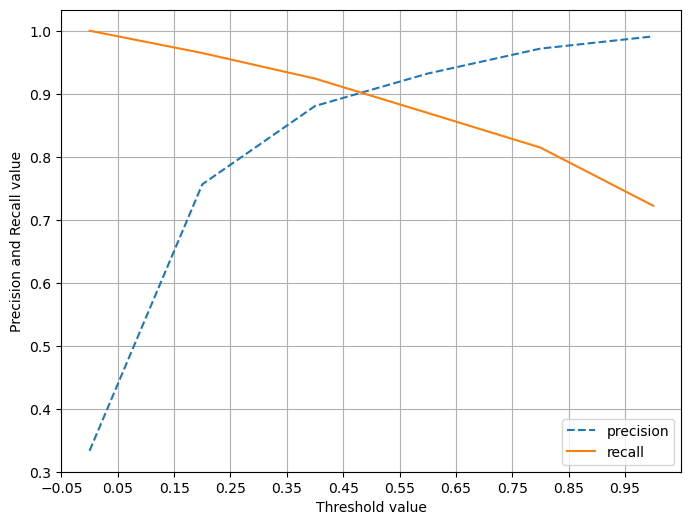

In [96]:
precision_recall_curve_plot(y_test,pred_prob_knn)

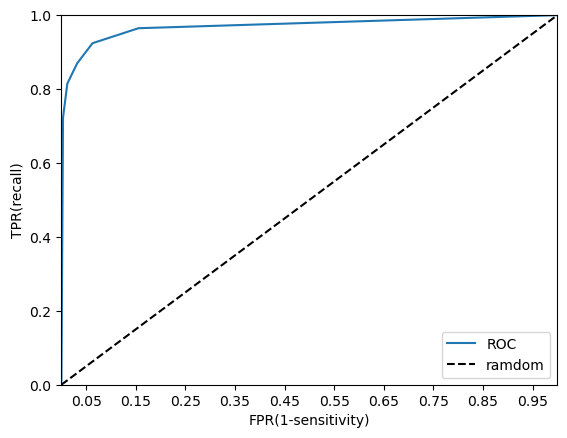

auc 값: 0.9695


In [97]:
## roc 커브 auc 값
roc_curve_plot(y_test,pred_prob_knn)
auc_score = roc_auc_score(y_test,pred_prob_knn)
print(f'auc 값: {np.round(auc_score,4)}')

### XGBoost

In [108]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
pred_proba_xgb = xgb.predict_proba(x_test)[:,1].reshape(-1,1)

In [109]:
get_eval_by_threshold(y_test,pred_proba_xgb)

임곗값: 0.25
##############
 [[4177  113]
 [  94 2051]] ############
 acc_score: 0.9678321678321679
 f1_score: 0.9519610118356927 
 precision: 0.9477818853974121 
 recall: 0.9561771561771562
임곗값: 0.3
##############
 [[4192   98]
 [ 100 2045]] ############
 acc_score: 0.9692307692307692
 f1_score: 0.9538246268656716 
 precision: 0.9542697153523099 
 recall: 0.9533799533799534
임곗값: 0.35
##############
 [[4201   89]
 [ 112 2033]] ############
 acc_score: 0.9687645687645687
 f1_score: 0.9528943051324116 
 precision: 0.9580584354382657 
 recall: 0.9477855477855478
임곗값: 0.45
##############
 [[4226   64]
 [ 139 2006]] ############
 acc_score: 0.9684537684537684
 f1_score: 0.9518386714116251 
 precision: 0.9690821256038648 
 recall: 0.9351981351981352
임곗값: 0.5
##############
 [[4232   58]
 [ 151 1994]] ############
 acc_score: 0.9675213675213675
 f1_score: 0.9502025256135335 
 precision: 0.9717348927875243 
 recall: 0.9296037296037296


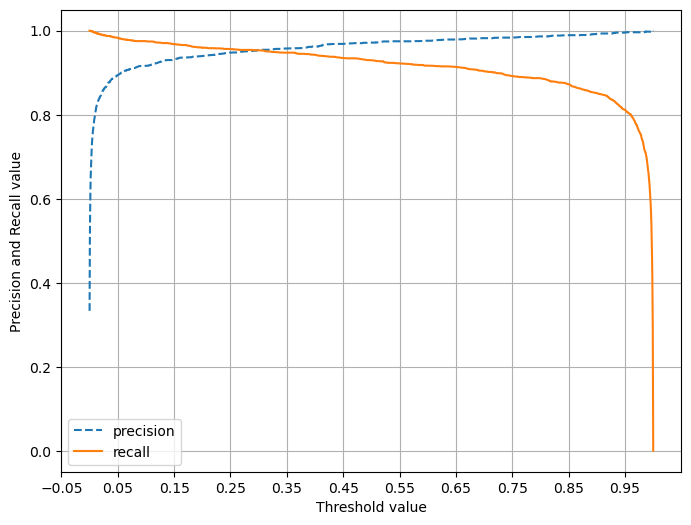

In [110]:
precision_recall_curve_plot(y_test,pred_proba_xgb)

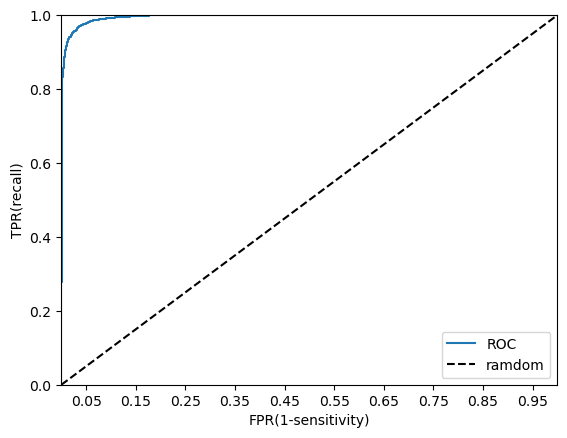

auc 0.9955484919121284


In [111]:
roc_curve_plot(y_test,pred_proba_xgb)
print(f'auc {roc_auc_score(y_test,pred_proba_xgb)}')

In [115]:
pd.Series(xgb.feature_importances_,index=x_train.columns).sort_values(ascending=False)

category_gas_transport     0.213543
거래량                        0.129310
주간                         0.109905
category_grocery_pos       0.071277
category_home              0.059948
category_shopping_pos      0.052188
category_food_dining       0.051536
category_entertainment     0.048222
category_grocery_net       0.046489
category_misc_net          0.045120
category_travel            0.037680
category_shopping_net      0.032579
category_personal_care     0.027188
category_misc_pos          0.022076
category_kids_pets         0.020507
카드거래간시간                    0.010158
category_health_fitness    0.008367
실소유자나이                     0.007665
하반기                        0.006242
dtype: float32